# MGL 382 Assignment 2

https://github.com/chaycwilson/MGL382-Assignment-2

Tiaan Theron - 577856   
Chay Wilson van Eck - 577502    
Christian Anyimadu - 577920     
Gregory Avvakoumides - 578199   
Tshiamo Mogoai - 576956     
Vutomi Monyalue Nkuna- 577359  

## 1. Problem Statement

The objective of this project is to predict the future stock prices of Apple Inc. (AAPL) up to December 2023, utilizing historical stock data provided. This analysis will help in understanding price trends and aiding investment decisions. The dataset includes daily stock metrics like Open, Close, High, Low, Volume, and Adjusted Close prices. By leveraging machine learning techniques and time series analysis, we aim to develop a predictive model that accurately forecasts stock price movements, thereby facilitating targeted investment strategies.

The columns are:
- Open: This is the price at which the stock first started trading during a trading session. It represents the initial valuation of the stock on that day.

- Close: This is the price at which the stock finished trading at the end of a trading session. It's considered the most crucial price point, as it reflects the final sentiment towards the stock for that day.

- High: This is the highest price the stock reached during the trading session. It shows the peak demand for the stock throughout the day.

- Low: This is the lowest price the stock reached during the trading session. It highlights the weakest point of demand and potential selling pressure.

- Volume: This represents the total number of shares of the stock that were traded during the session. It indicates the level of buying and selling activity for the stock.

- Adj Close (Adjusted Close): This is the closing price adjusted for any corporate actions like stock splits or dividends. It allows for accurate comparison of prices over time, removing the distorting effects of such events


## 2. Hypothesis Generation


- Days with higher trading volume are associated with greater changes in stock price (either increases or decreases).
- Apple's stock closing prices generally increase after significant product launch events.
- Apple’s stock price shows a positive reaction to favorable quarterly earnings reports.

## 3. Getting System Ready and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../data/apple_stock.csv')


## 4. Understanding the data

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [4]:
df.shape

(2475, 7)

Able to see that there is 7 different columns with 2475 different values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB


Able to distinguish the different data types of our data to proceed

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No duplicates in the data 

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2475 non-null   datetime64[ns]
 1   Open       2475 non-null   float64       
 2   High       2475 non-null   float64       
 3   Low        2475 non-null   float64       
 4   Close      2475 non-null   float64       
 5   Adj Close  2475 non-null   float64       
 6   Volume     2475 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 135.5 KB


## 5. Data Analysis

In [8]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2475,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,2018-12-01 06:41:27.272727296,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
min,2014-01-02 00:00:00,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,2016-06-16 12:00:00,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,2018-11-29 00:00:00,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,2021-05-17 12:00:00,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,2023-10-31 00:00:00,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09
std,NaN,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07


In [9]:
fig = px.line(df, x='Date', y='Close', title='Apple Stock Closing Prices Over Time',
            labels={'Close': 'Closing Price', 'Date': 'Date'})

fig.show()

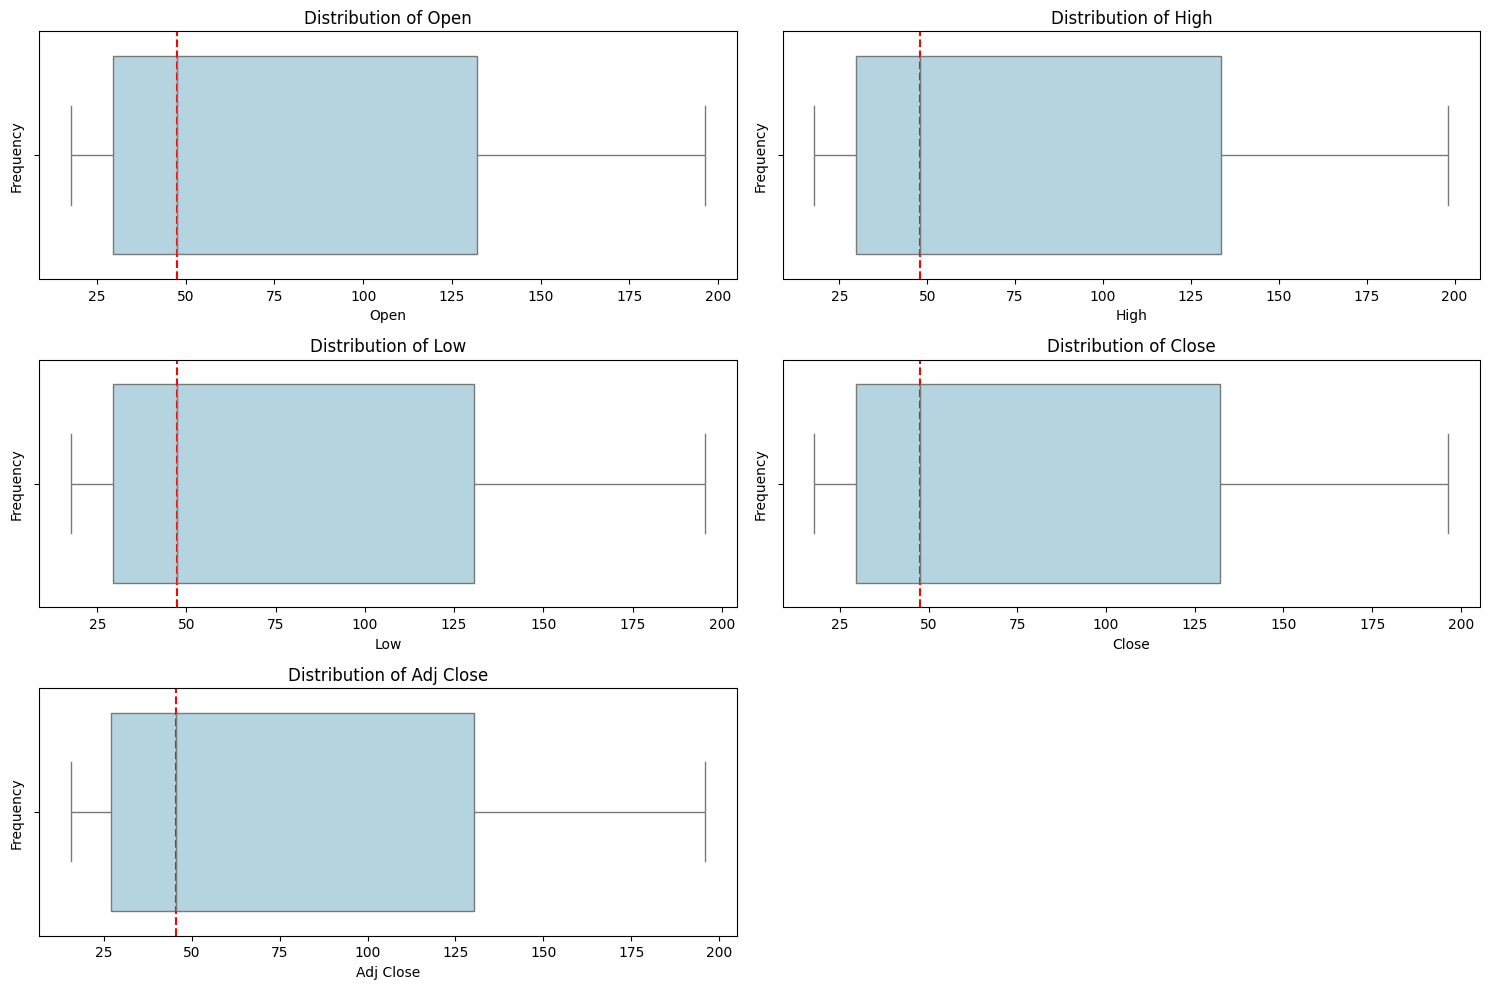

In [10]:

plt.figure(figsize=(15, 10))

columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  
    sns.boxplot(data=df, x=column, color='lightblue')

    # Calculating the median and showing it on plot
    median_value = df[column].median()
    plt.axvline(median_value, color='red', linestyle='--')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


No outliers are present so able to proceed to evaluation metrics

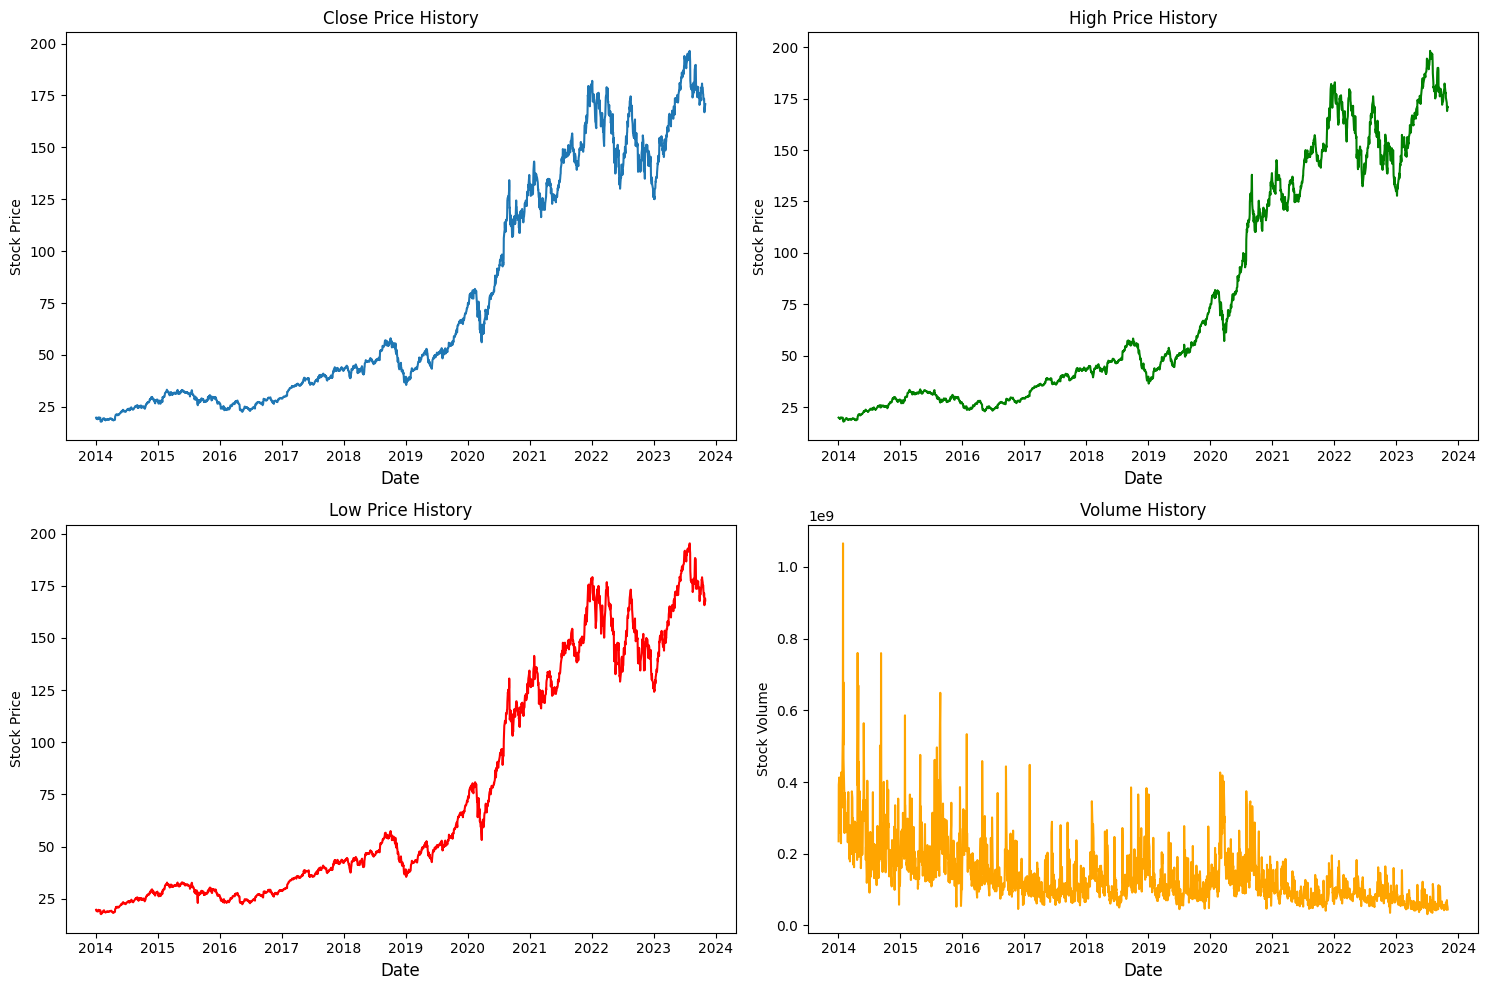

In [11]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# First Subplot - Close Price History
axes[0, 0].plot(df['Date'], df['Close'])
axes[0, 0].set_xlabel("Date", fontsize=12)
axes[0, 0].set_ylabel("Stock Price")
axes[0, 0].set_title("Close Price History")

# Second Subplot - High Price History
axes[0, 1].plot(df['Date'], df['High'], color="green")
axes[0, 1].set_xlabel("Date", fontsize=12)
axes[0, 1].set_ylabel("Stock Price")
axes[0, 1].set_title("High Price History")

# Third Subplot - Low Price History
axes[1, 0].plot(df['Date'], df['Low'], color="red")
axes[1, 0].set_xlabel("Date", fontsize=12)
axes[1, 0].set_ylabel("Stock Price")
axes[1, 0].set_title("Low Price History")

# Fourth Subplot - Volume History
axes[1, 1].plot(df['Date'], df['Volume'], color="orange")
axes[1, 1].set_xlabel("Date", fontsize=12)
axes[1, 1].set_ylabel("Stock Volume")
axes[1, 1].set_title("Volume History")

plt.tight_layout()
plt.show()

Further analysis of information to proceed to evaluation

## 6. Evaluation Metrics for Regression


For evaluating regression models predicting stock prices, you typically use metrics that quantify the model's accuracy in predicting continuous values. In this instance metrics like Mean Squared Error (MSE) willbe used on the testing set. It is the average of the squared differences between the actual and the predicted values. Lower the value, the better the regression model.



Split the data into training and a test sets, and calculate the index position to split the data based on lenght of the dataframe(df)

In [12]:
training_size = int(len(df) * 0.8)
training, testing = df.iloc[:training_size], df.iloc[training_size:]

Auto Regressive Intergrated Moving Average(ARIMA) is a popular time series forecasting model that incorporates autoregression, differencing, and moving average components.An ARIMA model is fitted to the training data. The order parameter specifies the order of the ARIMA model. In this case, it's set to (5,1,0), indicating an ARIMA model with a lag of 5, 1 differencing, and no moving average component.

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training['Close'], order=(5,1,0))  
model_fitting = model.fit()

After fitting the ARIMA model, this block forecasts future values for the testing set. The forecast() function predicts future values based on the fitted ARIMA model. The steps parameter specifies the number of steps (i.e., the length of the testing set) for which to forecast.

In [14]:
forecast = model_fitting.forecast(steps=len(testing))

After obtaining the forecasts, this block evaluates the performance of the ARIMA model. Mean Squared Error (MSE) is calculated as a measure of the model's accuracy in predicting the stock prices. MSE quantifies the average squared difference between the actual and predicted values.

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testing['Close'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 444.87468442086714


The code visualizes the actual and predicted stock prices using a line plot. It plots the actual closing prices from the testing set and overlays the predicted values generated by the ARIMA model. This visualization allows for a visual comparison of the model's predictions against the actual values.

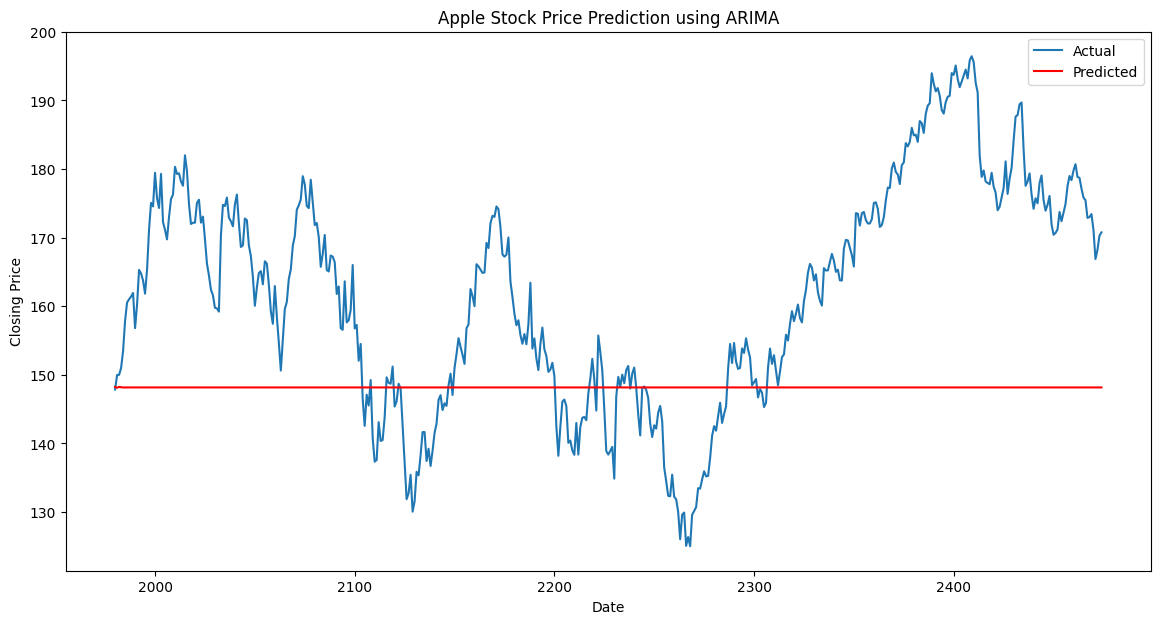

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(testing.index, testing['Close'], label='Actual')
plt.plot(testing.index, forecast, color='red', label='Predicted')
plt.title('Apple Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## 7. Model Building: Part 1 - Deep Learning Classification Algorithm

Before proceeding to feature engineering, let’s build a foundational deep learning model to predict whether the stock price will increase or decrease the next day. This allows us to have a baseline model to compare against after feature engineering.

### Data Pre-processing

#### Label Generation: Generate binary labels for our classification.

In [17]:
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

##### Feature Selection: Initially, let's use basic columns without additional engineered features.

In [18]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Target']

##### Scaling: Scale the features to ensure the neural network performs effectively.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train-Test Split: Splitting the dataset into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

### Deep Learning Model Implementation

#### Model Architecture: Building a simple neural network model using Keras.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Model definition with Input Layer
model = Sequential([
    Input(shape=(len(features),)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Model Training

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5038 - loss: 0.7269 - val_accuracy: 0.5313 - val_loss: 0.6951
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5153 - loss: 0.7186 - val_accuracy: 0.5293 - val_loss: 0.6944
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5126 - loss: 0.7044 - val_accuracy: 0.5354 - val_loss: 0.6953
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4998 - loss: 0.7033 - val_accuracy: 0.5475 - val_loss: 0.6943
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5500 - loss: 0.6939 - val_accuracy: 0.5414 - val_loss: 0.6951
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5138 - loss: 0.7016 - val_accuracy: 0.5414 - val_loss: 0.6935
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4967 - loss: 0.6942 - val_accuracy: 0.5333 - val_loss: 0.6937
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5372 - loss: 0.6911 - val_accuracy: 0.5212 - val_loss:

#### Model Evaluation: Checking the accuracy on the test set.

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.5408 - loss: 0.6912
Test Accuracy: 52.12%


### Visualization of Training Process

#### Plotting Loss and Accuracy

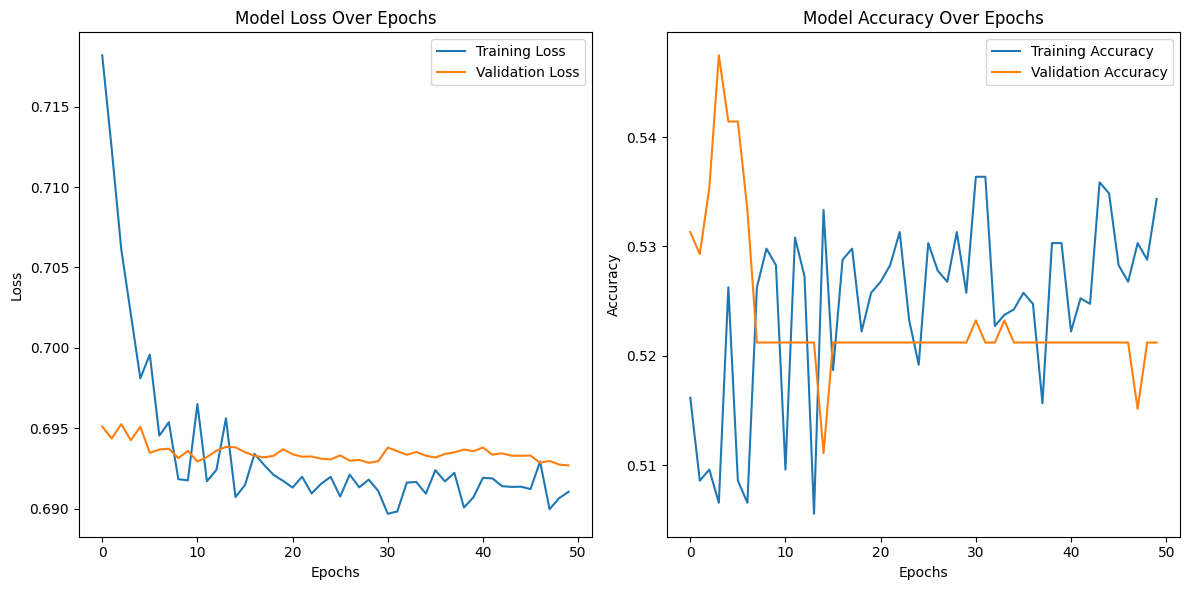

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 8. Feature Engineering

After establishing a basic model, let’s enhance our dataset with new features that may capture more complex patterns and possibly improve our model's performance.

### New Features

##### Moving Averages: Useful to determine trends. We will calculate short-term and long-term moving averages.

In [25]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

#### Relative Strength Index (RSI): Measures the speed and change of price movements. Generally, an RSI above 70 indicates overbought (potential sell), and below 30 indicates oversold (potential buy).

In [26]:
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

#### Momentum: Measures the amount by which the price has changed over a given number of days.

In [27]:
df['Momentum'] = df['Close'].diff(periods=10)

### Updating Dataset for Model Building

Now update the feature set to include these new attributes and re-scale them.

In [28]:
additional_features = ['MA10', 'MA50', 'RSI', 'Momentum']
new_features = features + additional_features
X_new = df[new_features].fillna(0)  # Fill NaN values which are the result of rolling functions
X_scaled_new = scaler.fit_transform(X_new)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_scaled_new, y, test_size=0.2, random_state=0)

## 9. Model Building: Part 2 - Implementing With Feature Engineering

Now that we have engineered new features, let’s build the model again and evaluate if there’s an improvement in performance.

### Model Re-implementation

Use the same neural network architecture with the updated feature set.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Model definition with Input Layer
model_new = Sequential()
model_new.add(Input(shape=(len(new_features),)))
model_new.add(Dense(64, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(32, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(1, activation='sigmoid'))

model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_new = model_new.fit(X_train_new, y_train, validation_data=(X_test_new, y_test), epochs=50, batch_size=32)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5038 - loss: 0.7659 - val_accuracy: 0.5273 - val_loss: 0.6926
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5043 - loss: 0.7248 - val_accuracy: 0.5192 - val_loss: 0.6909
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5085 - loss: 0.7086 - val_accuracy: 0.5475 - val_loss: 0.6917
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5146 - loss: 0.7038 - val_accuracy: 0.5515 - val_loss: 0.6908
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5003 - loss: 0.7013 - val_accuracy: 0.5232 - val_loss: 0.6916
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5310 - loss: 0.6947 - val_accuracy: 0.5313 - val_loss: 0.6917
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5260 - loss: 0.6975 - val_accuracy: 0.5434 - val_loss: 0.6920
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5169 - loss: 0.6948 - val_accuracy: 0.5414 - val_loss:

### Model Evaluation with New Features

In [30]:
loss_new, accuracy_new = model_new.evaluate(X_test_new, y_test)
print(f'Improved Test Accuracy with Feature Engineering: {accuracy_new*100:.2f}%')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.5406 - loss: 0.6917
Improved Test Accuracy with Feature Engineering: 51.92%


This refined model includes new features that help to grasp the dynamics of stock movements better and potentially improve prediction accuracy.

### Visualizing the Improved Training Process

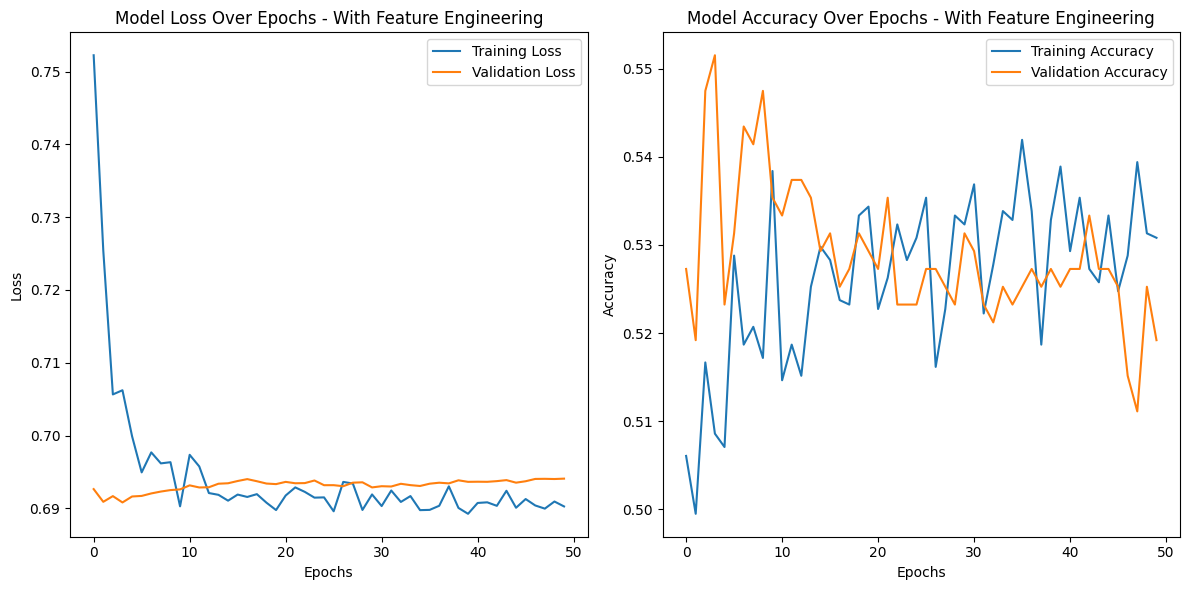

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs - With Feature Engineering')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_new.history['accuracy'], label='Training Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs - With Feature Engineering')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

This workflow demonstrates the impact of feature engineering on predictive modeling, reinforcing the value of understanding underlying patterns not visible through rudimentary data.

In [32]:
import joblib

joblib.dump(model, '../artifacts/model_1.pkl')
joblib.dump(model_new, '../artifacts/model_2.pkl')


model_1 = joblib.load('../artifacts/model_1.pkl')
model_2 = joblib.load('../artifacts/model_2.pkl')